# Chaper 6 Stationary Gaussian Process

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy

In [86]:
J=10
h = 1/10
print(np.fft.fftfreq(J, d=h))
print(np.hstack((np.arange(1+J/ 2), np.arange(- J / 2 + 1,0))))

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[ 0.  1.  2.  3.  4.  5. -4. -3. -2. -1.]


In [87]:
fft=np.fft.fft
def get_coeffs(u,a,b):
    J = u.size - 1
    assert (J % 2 == 0)
    h = (b - a) / J 
    u1 = np.hstack(((u[0] + u[-1]) / 2, u[1:-1]))
    Uk = (h / (b - a)) * np.exp((-2 * pi * 1j * a / (b - a)) * np.arange(J)) * fft(u1)
    nu = (2*pi/(b - a)) * np.hstack((np.arange(-J/2 + 1, 0), np.arange(1 + J/2)))
    return Uk, nu

def spectral_density(X,T):
    '''(6.7)'''
    Uk,nu=get_coeffs(X, 0, T)
    f=(np.abs(Uk) ** 2) * T / (2 * pi)
    return f, nu 
def icspde_dst1(u):
    return scipy.fftpack.dst(u,type=1,axis=0)/2


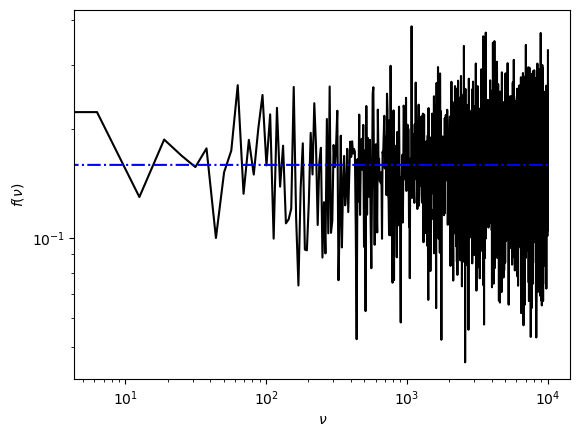

In [88]:
nsamples = 10
J = 3200
T = 10.0
dt = T/J
fc = np.zeros(J+2)
for m in range(nsamples):
    # generate white noise?
    xi=np.random.randn(J+1)
    coeffs=sqrt(2)*xi
    y2=np.hstack([0,icspde_dst1(coeffs),0])
    f,nu=spectral_density(y2,1)
    fc=fc+f
fc = fc/nsamples
poly =0*fc + 1./(2*pi)
plt.loglog(nu, fc, 'k-')
plt.loglog(nu, poly,'b-.')
s=plt.xlabel(r'$\nu$')
s=plt.ylabel(r'$f(\nu)$')

Whittle-Matern covariance 
$$c_q(t)=\frac{|t|^q}{2^{q-1}\Gamma(q)}K_q(|t|)$$


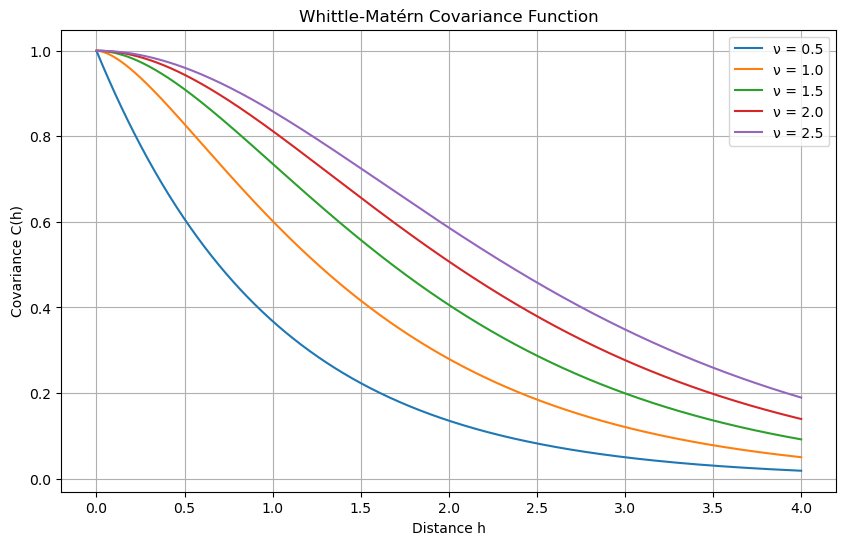

In [91]:
from scipy.special import kv  # kv 是贝塞尔函数 Kν

# Whittle-Matérn 协方差函数
def whittle_matern_cov(h, q=0.5):
    factor = (2 ** (1 - q)) / gamma(q)
    return factor * (h ** q) * kv(q, h)

# 定义距离 h
h = np.linspace(0.001, 4, 1001)

# 绘制不同参数下的 Whittle-Matérn 协方差
plt.figure(figsize=(10, 6))
for q in [0.5, 1.0, 1.5, 2.0, 2.5]:  # 平滑参数
    cov_values = whittle_matern_cov(h, q)
    plt.plot(h, cov_values, label=f"ν = {q}")

plt.title("Whittle-Matérn Covariance Function")
plt.xlabel("Distance h")
plt.ylabel("Covariance C(h)")
plt.legend()
plt.grid(True)
plt.show()


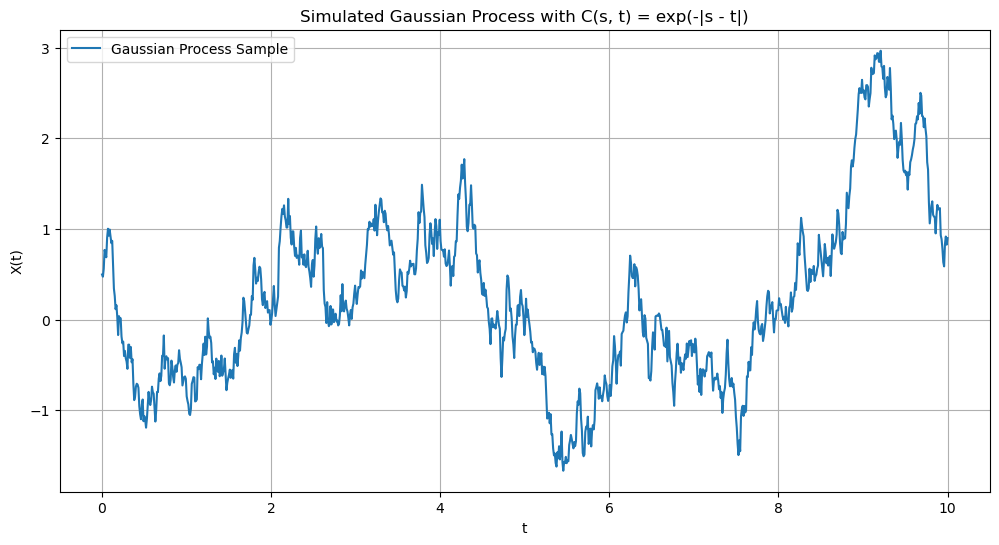

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 1. 选择时间点集合
t0 = 0
T = 10
n = 1000
t = np.linspace(t0, T, n)

# 2. 计算协方差矩阵
def covariance_function(s, t):
    return np.exp(-np.abs(s - t))

# 构建协方差矩阵 K
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = covariance_function(t[i], t[j])

# 添加抖动以提高数值稳定性
epsilon = 1e-10
K += epsilon * np.eye(n)

# 3. Cholesky 分解
try:
    L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
    print("协方差矩阵非正定，无法进行 Cholesky 分解。")
    exit()

# 生成标准正态随机向量 z
z = np.random.randn(n)

# 构建高斯过程样本 x
x = L @ z

# 4. 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Gaussian Process Sample')
plt.title('Simulated Gaussian Process with C(s, t) = exp(-|s - t|)')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

